<a href="https://colab.research.google.com/github/shashi3876/tax_analysis/blob/main/Tax_Calculator_Canada_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculate the take home salary plus the government benefits for a family (with two incomes) and possibly multiple children



Creating multiple functions to calculate the CPP deductions, EI deductions, Federal tax deductions, and provincial tax deductions.

## Function to calculate the EI premiums, CPP contirbutions, and QPP contributions


In [2]:
def calculate_contributions(income, rate, maximum):
    """
    Calculate the contribution based on income and a rate, but do not exceed a maximum limit.

    Args:
        income (float): The amount of income earned.
        rate (float): The rate at which contributions are calculated as a percentage of income.
        maximum (float): The maximum allowable contribution.

    Returns:
        float: The lesser of the calculated contribution and the maximum limit.
    """
    return min(income * rate,maximum)

Testing the EI premiums

In [3]:
ei_rate = 1.63 / 100  # 1.66%
ei_max = 1049.12
cpp_rate = 5.95 / 100  # 5.95%
cpp_max = 3754.45
qpp_rate = 6.15 / 100  # 6.15%
qpp_max = 4095.90

def check_contributions(income):
  ei_deductions = calculate_contributions(income,ei_rate,ei_max)
  cpp_deductions = calculate_contributions(income,cpp_rate,cpp_max)
  qpp_deductions = calculate_contributions(income,qpp_rate,qpp_max)

  print(f'EI deductions = {ei_deductions} CPP = {cpp_deductions} QPP = {qpp_deductions}')

check_contributions(100000)
check_contributions(50000)
check_contributions(20000)

EI deductions = 1049.12 CPP = 3754.45 QPP = 4095.9
EI deductions = 814.9999999999999 CPP = 2975.0 QPP = 3075.0000000000005
EI deductions = 325.99999999999994 CPP = 1190.0 QPP = 1230.0000000000002


## Calculate the federal and provincial taxes

The federal and provincial taxes are calculated using a bracketed tax model. Income in each bracket is taxed at a specific rate. The brackets and tax rates vary across provinces and territories.  Federal taxes also have separate brackets and rates.  Furthermore, for federal taxes, there is a basic personal amount that is exempt from tax. This amount is subtracted from your income before calculating your federal tax liability.

In [4]:
def calculate_tax(income, tax_free_amount, brackets):
  """
  Calculates the income tax based on provided brackets and tax-free amount.

  Args:
      income (float): The taxable income.
      tax_free_amount (float): The tax-free amount.
      brackets (list): A list of tuples representing tax brackets.
          Each tuple contains (upper_bound, tax_rate).

  Returns:
      float: The total tax amount.
  """

  taxable_income = max(income - tax_free_amount, 0)  # Tax on income after tax-free amount
  total_tax = 0
  for upper_bound, tax_rate in brackets:
    if taxable_income <= 0:
      break  # No more tax to calculate if taxable income is 0
    if upper_bound is None:  # Upper bound of None means tax applies to all remaining income
      total_tax += taxable_income * tax_rate
      break
    elif taxable_income <= upper_bound:
      taxable_in_bracket = taxable_income
    else:
      taxable_in_bracket = upper_bound
    total_tax += taxable_in_bracket * tax_rate
    taxable_income -= taxable_in_bracket
  return total_tax

# Example usage
income = 100000
tax_free_amount = 15000
brackets = [(33389, 0.108), (72164, 0.1275), (None, 0.174)]

tax = calculate_tax(income, tax_free_amount, brackets)
print(f"Total tax for income ${income:.2f} with tax-free amount ${tax_free_amount:.2f} is ${tax:.2f}")


Total tax for income $100000.00 with tax-free amount $15000.00 is $10186.41


In [5]:
federal_brackets = [(50197, 0.15), (100392, 0.205), (155625, 0.26), (221708, 0.293), (None, 0.33)]

# Provincial tax brackets for different provinces
provincial_brackets = {
        'BC': [(42336, 0.0506), (84673, 0.077), (96866, 0.105), (117623, 0.1229), (159483, 0.147), (None, 0.168)],
        'AB': [(None, 0.10)],  # Update Alberta to single rate of 10%
        'ON': [(45142, 0.0505), (90287, 0.0915), (150000, 0.1116), (220000, 0.1216), (None, 0.1316)],
        'QC': [(45905, 0.15), (91805, 0.20), (110630, 0.24), (None, 0.2575)],
        'NS': [(29590, 0.0879), (59180, 0.1495), (93000, 0.1667), (150000, 0.175), (None, 0.21)],
        'MB': [(33389, 0.108), (72164, 0.1275), (None, 0.174)],
        'SK': [(45677, 0.105), (130506, 0.125), (None, 0.145)],
        'NL': [(38081, 0.087), (76161, 0.145), (None, 0.158)],
        'NB': [(43835, 0.0968), (87675, 0.1482), (142534, 0.1652), (None, 0.1784)],
        'PE': [(31984, 0.098), (63969, 0.138), (None, 0.167)]
    }


Testing the federal tax amounts.

In [6]:
tax_free_amount=15750

income=200000
tax = calculate_tax(income, tax_free_amount, federal_brackets)
print(f"Total tax for income ${income:.2f} with tax-free amount ${tax_free_amount:.2f} is ${tax:.2f}")

income=100000
tax = calculate_tax(income, tax_free_amount, federal_brackets)
print(f"Total tax for income ${income:.2f} with tax-free amount ${tax_free_amount:.2f} is ${tax:.2f}")

income=50000
tax = calculate_tax(income, tax_free_amount, federal_brackets)
print(f"Total tax for income ${income:.2f} with tax-free amount ${tax_free_amount:.2f} is ${tax:.2f}")

Total tax for income $200000.00 with tax-free amount $15750.00 is $36861.77
Total tax for income $100000.00 with tax-free amount $15750.00 is $14510.41
Total tax for income $50000.00 with tax-free amount $15750.00 is $5137.50


Testing the provincial tax amounts.

In [7]:
tax_free_amount=0

income=200000
tax = calculate_tax(income, tax_free_amount, provincial_brackets['AB'])
print(f"Total tax for income ${income:.2f} in AB is ${tax:.2f}")

income=100000
tax = calculate_tax(income, tax_free_amount, provincial_brackets['ON'])
print(f"Total tax for income ${income:.2f} in ON is ${tax:.2f}")

income=50000
tax = calculate_tax(income, tax_free_amount, provincial_brackets['NB'])
print(f"Total tax for income ${income:.2f} in NB is ${tax:.2f}")

Total tax for income $200000.00 in AB is $20000.00
Total tax for income $100000.00 in ON is $7299.18
Total tax for income $50000.00 in NB is $5156.88


## Calculating the CCB

In Canada, families with children up to the age of 17 are eligible for the Canadian Child Benefit (CCB). This is based on the number of children, their ages, and the family's income before taxes. Here, I wrote a function to calculate the CCB benefits for a family.

Resources from https://www.canada.ca/en/revenue-agency/services/child-family-benefits/canada-child-benefit-overview/canada-child-benefit-we-calculate-your-ccb.html have been used to calculate this value. Howevr, caclulated CCB values may not be accurate due to other reasons.

In [8]:
def calculate_ccb(total_income, children_under_6=0, children_aged_6_to_17=0):
    """
    Calculates the estimated Canada Child Benefit (CCB) per year for a family.
    Args:
        total_income (float): The total income of the family before tax.
        children_under_6 (int, optional): The number of children aged 0 to 6 in the family. Defaults to 0.
        children_aged_6_to_17 (int, optional): The number of children aged 6 to 17 in the family. Defaults to 0.
    Returns:
        float: The estimated total CCB benefit amount for the year.
    """
    # Define maximum CCB benefits for 2024
    max_benefit_under_6 = 6997  # As of the latest guidelines
    max_benefit_aged_6_to_17 = 5903  # As of the latest guidelines

    # Adjusted Family Net Income (AFNI) threshold
    afni_threshold = 32797

    # Calculate total maximum benefit
    total_max_benefit = (children_under_6 * max_benefit_under_6) + (children_aged_6_to_17 * max_benefit_aged_6_to_17)

    # Total number of children
    total_children = children_under_6 + children_aged_6_to_17

    # Determine the reduction rate based on the number of children
    if total_children == 1:
        reduction_rate = 0.07
    elif total_children == 2:
        reduction_rate = 0.135
    elif total_children == 3:
        reduction_rate = 0.19
    else:
        reduction_rate = 0.23  # For four or more children

    # Calculate reduction if income is above the threshold
    if total_income > afni_threshold:
        income_over_threshold = total_income - afni_threshold
        benefit_reduction = income_over_threshold * reduction_rate
        total_benefit = max(0, total_max_benefit - benefit_reduction)
    else:
        total_benefit = total_max_benefit

    return total_benefit

# Example usage
total_income = 150000
children_under_6 = 1
children_aged_6_to_17 = 0

estimated_ccb = calculate_ccb(total_income, children_under_6, children_aged_6_to_17)
print(f"Estimated total CCB benefit for the year: ${estimated_ccb:.2f}")


Estimated total CCB benefit for the year: $0.00


## Calculate the final take-home for a family.

Here, I will attempt to combine all three of the above functions to calculate the final take-home amount for a family after taxes and after receiving the Canadian Child Benefit (CCB). We will receive two inputs: the incomes of the first and second person, the province they live in, and the number of children under age 6 and between ages 7 to 17.

In [9]:
def calculate_take_home(income_1,income_2,province,children_under_6,children_aged_6_to_17):
    """
    Calculates the take home income including the salary after tax and Canada Child Benefit (CCB) per year for a family.
    Args:
        income_1 (float): The total income of the first person before tax.
        income_2 (float): The total income of the secondt person before tax.
        province : The province in Canada
        children_under_6 (int): The number of children aged 0 to 6 in the family. Defaults to 0.
        children_aged_6_to_17 (int): The number of children aged 6 to 17 in the family. Defaults to 0.
    Returns:
        float: The estimated total income after tax plus the CCB benefit amount for the year.
    """
    # calculate the ei and cpp

    ei_deductions_1 = calculate_contributions(income_1,ei_rate,ei_max)
    cpp_deductions_1 = calculate_contributions(income_1,cpp_rate,cpp_max)

    ei_deductions_2 = calculate_contributions(income_2,ei_rate,ei_max)
    cpp_deductions_2 = calculate_contributions(income_2,cpp_rate,cpp_max)

    # Calcukate the federal and provincial tax
    federal_tax_1 = calculate_tax(income_1, tax_free_amount, federal_brackets)
    federal_tax_2 = calculate_tax(income_2, tax_free_amount, federal_brackets)

    provincial_tax_1 = calculate_tax(income_1, tax_free_amount, provincial_brackets[province])
    provincial_tax_2 = calculate_tax(income_2, tax_free_amount, provincial_brackets[province])

    estimated_ccb = calculate_ccb(income_1+income_2, children_under_6, children_aged_6_to_17)

    total_take_home = income_1 + income_2 - ei_deductions_1 - ei_deductions_2 - cpp_deductions_1  - cpp_deductions_2 - federal_tax_1 - federal_tax_2 - provincial_tax_1 - provincial_tax_2 + estimated_ccb

    return total_take_home

Now let's check the function for some of the possible values.

In [10]:
income_1=40000
income_2=60000
children_under_6=1
children_aged_6_to_17=1
province='ON'
take_home=calculate_take_home(income_1,income_2,province,children_under_6,children_aged_6_to_17)
print(f'Take-home income is ${take_home:.0f} for a family with {children_under_6} kids under 6, {children_aged_6_to_17} kids between 6 to 17 living in {province}, with two people having incomes of ${income_1:.0f} and ${income_2:.0f}.')

income_1=40000
income_2=60000
children_under_6=1
children_aged_6_to_17=1
province='NB'
take_home=calculate_take_home(income_1,income_2,province,children_under_6,children_aged_6_to_17)
print(f'Take-home income is ${take_home:.0f} for a family with {children_under_6} kids under 6, {children_aged_6_to_17} kids between 6 to 17 living in {province}, with two people having incomes of ${income_1:.0f} and ${income_2:.0f}.')

income_1=40000
income_2=60000
children_under_6=0
children_aged_6_to_17=1
province='ON'
take_home=calculate_take_home(income_1,income_2,province,children_under_6,children_aged_6_to_17)
print(f'Take-home income is ${take_home:.0f} for a family with {children_under_6} kids under 6, {children_aged_6_to_17} kids between 6 to 17 living in {province}, with two people having incomes of ${income_1:.0f} and ${income_2:.0f}.')


Take-home income is $75049 for a family with 1 kids under 6, 1 kids between 6 to 17 living in ON, with two people having incomes of $40000 and $60000.
Take-home income is $70198 for a family with 1 kids under 6, 1 kids between 6 to 17 living in NB, with two people having incomes of $40000 and $60000.
Take-home income is $72420 for a family with 0 kids under 6, 1 kids between 6 to 17 living in ON, with two people having incomes of $40000 and $60000.


The above function calculates the take-home incomes.

# Analyse the function using different settings


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

In [12]:
province = 'AB'
children_under_6 = 2
children_aged_6_to_17 = 1

# Range of incomes to simulate
incomes = np.linspace(0, 250000, 26)  # Generates 10 linearly spaced values from 20k to 100k

# Prepare combinations of income_1 and income_2
income_combinations = [(x, y) for x in incomes for y in incomes]
income2 = 0
results = [calculate_take_home(income1, income2, province, children_under_6, children_aged_6_to_17)
           for income1 in incomes]
total_incomes = [income1 + income2 for income1 in incomes]


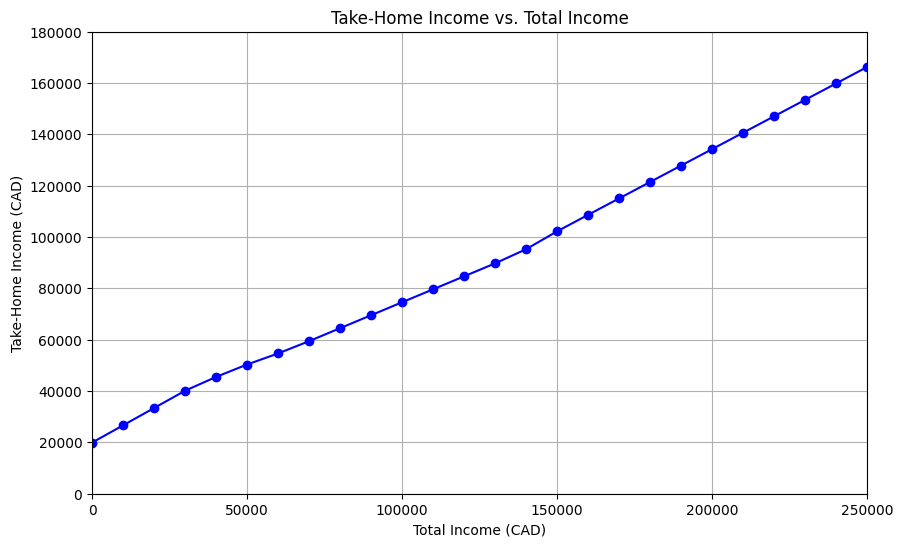

In [13]:
# Sort data by total income
sorted_data = sorted(zip(total_incomes, results))
sorted_total_incomes, sorted_results = zip(*sorted_data)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_total_incomes, sorted_results, marker='o', linestyle='-', color='blue')
plt.title('Take-Home Income vs. Total Income')
plt.xlabel('Total Income (CAD)')
plt.ylabel('Take-Home Income (CAD)')

# Setting the axis limits
plt.xlim(0, 250000)
plt.ylim(0, 180000)

plt.grid(True)
plt.show()

In [14]:
len(results)

26

# Single Person Without Kids: Total Income vs. Take-Home Income in Different Provinces

Let's examine the situation of a single person under the current tax structure. According to Statistics Canada, 29.3% of people fall into this category. Let's see how the province they live in affects their take-home income. For simplicity, I will only check four provinces including Ontario (ON), Alberta (AB), Quebec (QC), and Nova Scotia (NS). These four provinces comprise 72% of the total population of Canada and have been selected to represent the western, eastern, and maritime regions of the country.

In [26]:
provinces = ['AB','ON','NS','QC']
children_under_6 = 0
children_aged_6_to_17 = 0

# Range of incomes to simulate
incomes = np.linspace(0, 500000, 51)  # Generates 10 linearly spaced values from 20k to 100k
income2 = 0
results={}
for prov in provinces:
  results[prov] = [calculate_take_home(income1, income2, prov, children_under_6, children_aged_6_to_17) for income1 in incomes]


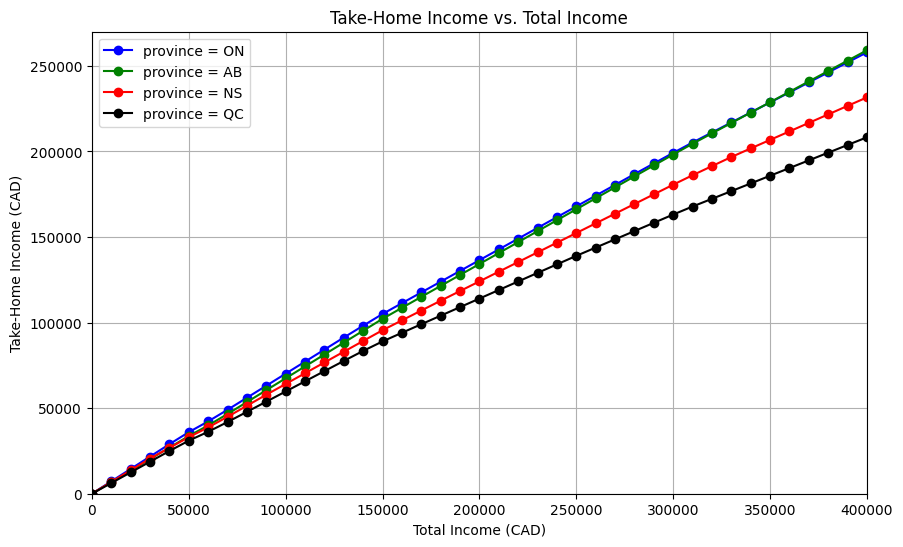

In [27]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(incomes, results['ON'], marker='o', linestyle='-', color='blue', label='province = ON')
plt.plot(incomes, results['AB'], marker='o', linestyle='-', color='green', label='province = AB')
plt.plot(incomes, results['NS'], marker='o', linestyle='-', color='red', label='province = NS')
plt.plot(incomes, results['QC'], marker='o', linestyle='-', color='black', label='province = QC')
plt.title('Take-Home Income vs. Total Income')
plt.xlabel('Total Income (CAD)')
plt.ylabel('Take-Home Income (CAD)')

# Setting the axis limits
plt.xlim(0, 400000)
plt.ylim(0, 270000)

plt.legend()
plt.grid(True)
plt.show()

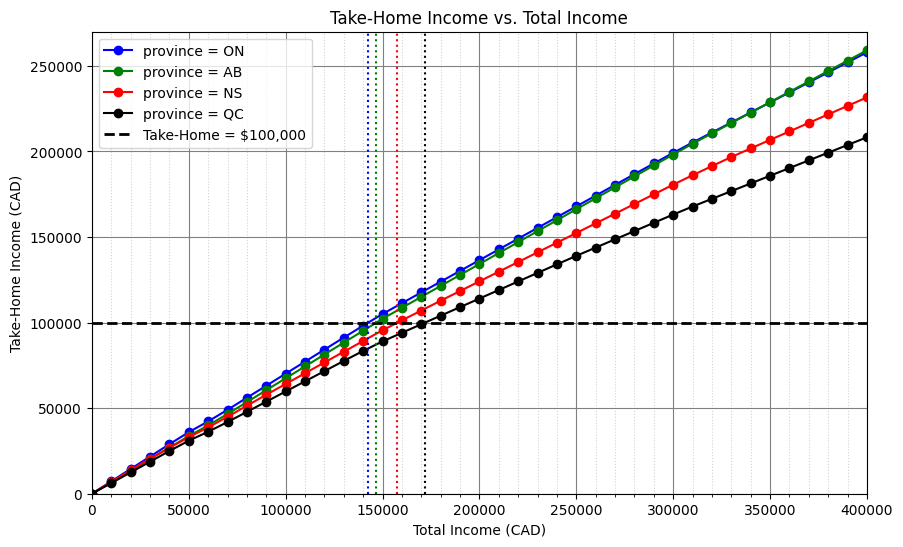

In [28]:
plt.figure(figsize=(10, 6))
colors = {'ON': 'blue', 'AB': 'green', 'NS': 'red', 'QC': 'black'}
for prov, color in colors.items():
    plt.plot(incomes, results[prov], marker='o', linestyle='-', color=color, label=f'province = {prov}')

# Add horizontal line
y_intercept = 100000
plt.axhline(y=y_intercept, color='black', linewidth=2,linestyle='--', label='Take-Home = $100,000')

# Find intersections and plot vertical lines
for prov, color in colors.items():
    # np.interp for linear interpolation to find the income where the result equals 80000
    income_at_intercept = np.interp(y_intercept, results[prov], incomes)
    plt.axvline(x=income_at_intercept, color=color, linestyle=':')

plt.title('Take-Home Income vs. Total Income')
plt.xlabel('Total Income (CAD)')
plt.ylabel('Take-Home Income (CAD)')
plt.xlim(0, 400000)
plt.ylim(0, 270000)
plt.legend()

# Set major ticks at every 50,000
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

# Set minor ticks at every 10,000
plt.gca().xaxis.set_minor_locator(MultipleLocator(10000))

# Enable grid on minor ticks for x-axis, maintaining grid for major ticks
plt.grid(True, which='minor', linestyle=':', color='lightgray')
plt.grid(True, which='major', linestyle='-', color='gray')

plt.show()

As evident from the graph, the province you live in has a significant impact on the amount of take-home income. For example, to achieve a take-home income of 100,000, one has to earn around $30,000 more in Quebec than in Alberta or Ontario. Alberta and Ontario seem to be the best provinces for higher earners as the income tax rates are lower, resulting in a higher take-home income.

#Two-Income Family with No Kids: Total Income vs. Take-Home Income Under Different Income Ratios Between the Two People

Here we analyze the take-home income for a couple without children under different income ratios. For simplicity, we will focus on a family living in Ontario, as it accounts for almost 40% of Canada's entire population. We will examine the following three income distributions: 1) 100/0, 2) 25/75, 3) 50/50.



In [18]:
province = 'ON'
children_under_6 = 0
children_aged_6_to_17 = 0

# Range of incomes to simulate
total_income = np.linspace(0, 400000, 41)  # Generates 10 linearly spaced values from 20k to 100k


income_splits=['0/100','25/75','50/50']
results={}

for split in income_splits:
    # Parse the split ratios
    split_ratio = split.split('/')
    income1_ratio = int(split_ratio[0]) / 100
    income2_ratio = int(split_ratio[1]) / 100

    # Calculate the take-home income for each total_income based on the split
    results[split] = [
        calculate_take_home(income1_ratio * total_income, income2_ratio * total_income, province, children_under_6, children_aged_6_to_17)
        for total_income in total_income
    ]

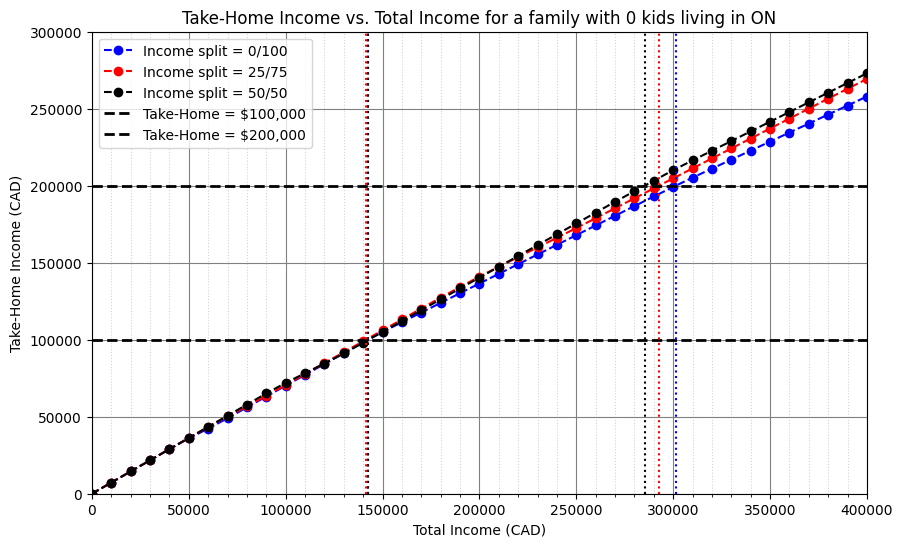

In [19]:

plt.figure(figsize=(10, 6))
colors = {'0/100': 'blue', '25/75': 'red', '50/50': 'black'}
for split, color in colors.items():
    plt.plot(total_income, results[split], marker='o', linestyle='--', color=color, label=f'Income split = {split}')

# Add horizontal line
y_intercept = 100000
plt.axhline(y=y_intercept, color='black', linestyle='--',linewidth=2, label='Take-Home = $100,000')

# Add horizontal line
y_intercept_2 = 200000
plt.axhline(y=y_intercept_2, color='black', linestyle='--',linewidth=2, label='Take-Home = $200,000')

# Find intersections and plot vertical lines
for split, color in colors.items():
    # np.interp for linear interpolation to find the income where the result equals 100000 and 200000
    income_at_intercept = np.interp(y_intercept, results[split], total_income)
    plt.axvline(x=income_at_intercept, color=color, linestyle=':')
    income_at_intercept2 = np.interp(y_intercept_2, results[split], total_income)
    plt.axvline(x=income_at_intercept2, color=color, linestyle=':')

plt.title(f'Take-Home Income vs. Total Income for a family with {children_under_6+children_aged_6_to_17} kids living in {province}')
plt.xlabel('Total Income (CAD)')
plt.ylabel('Take-Home Income (CAD)')
plt.xlim(00000, 400000)
plt.ylim(00000, 300000)
plt.legend()

# Set major ticks at every 50,000
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

# Set minor ticks at every 10,000
plt.gca().xaxis.set_minor_locator(MultipleLocator(10000))

# Enable grid on minor ticks for x-axis, maintaining grid for major ticks
plt.grid(True, which='minor', linestyle=':', color='lightgray')
plt.grid(True, which='major', linestyle='-', color='gray')

plt.show()

As evident from the above graph, the take-home amount does not change significantly between different income distributions when the total income is low. For example, to have a take-home income of \$100,000, the total income must be around $140,000 for any income distribution. However, as the total income increases, the tax system favors a family with equal earnings. For instance, to have a take-home income of \$200,000, a single person should earn \$300,000, while a family with equal incomes would only need a total income of \$285,000. Yet, in the grand scheme of things, one can argue that the differences are not that significant. So, let's look at another province where the tax rates are higher. Let's select Quebec, as it has higher tax rates and a larger population (8.5 million).

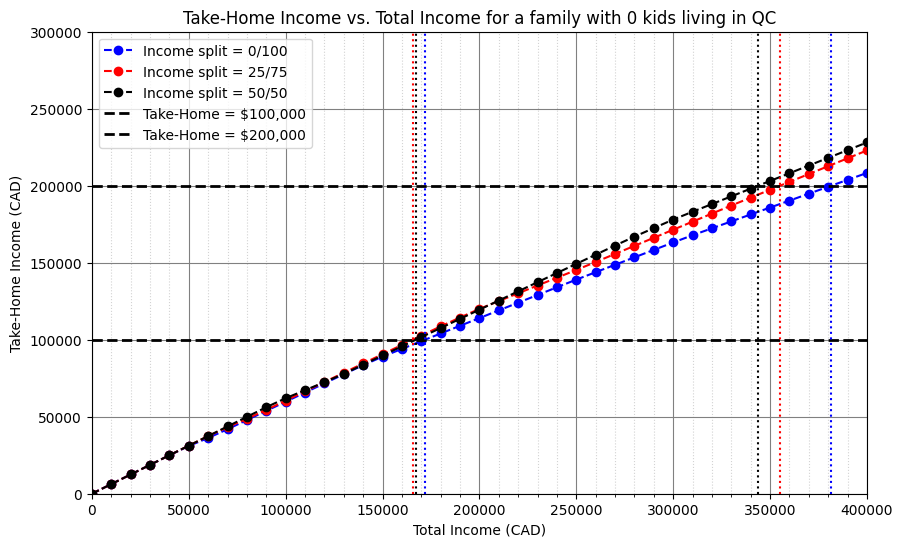

In [29]:
province = 'QC'
children_under_6 = 0
children_aged_6_to_17 = 0

# Range of incomes to simulate
total_income = np.linspace(0, 400000, 41)  # Generates 10 linearly spaced values from 20k to 100k


income_splits=['0/100','25/75','50/50']
results={}

for split in income_splits:
    # Parse the split ratios
    split_ratio = split.split('/')
    income1_ratio = int(split_ratio[0]) / 100
    income2_ratio = int(split_ratio[1]) / 100

    # Calculate the take-home income for each total_income based on the split
    results[split] = [
        calculate_take_home(income1_ratio * total_income, income2_ratio * total_income, province, children_under_6, children_aged_6_to_17)
        for total_income in total_income
    ]


plt.figure(figsize=(10, 6))
colors = {'0/100': 'blue', '25/75': 'red', '50/50': 'black'}
for split, color in colors.items():
    plt.plot(total_income, results[split], marker='o', linestyle='--', color=color, label=f'Income split = {split}')

# Add horizontal line
y_intercept = 100000
plt.axhline(y=y_intercept, color='black', linestyle='--',linewidth=2, label='Take-Home = $100,000')

# Add horizontal line
y_intercept_2 = 200000
plt.axhline(y=y_intercept_2, color='black', linestyle='--',linewidth=2, label='Take-Home = $200,000')

# Find intersections and plot vertical lines
for split, color in colors.items():
    # np.interp for linear interpolation to find the income where the result equals 100000 and 200000
    income_at_intercept = np.interp(y_intercept, results[split], total_income)
    plt.axvline(x=income_at_intercept, color=color, linestyle=':')
    income_at_intercept2 = np.interp(y_intercept_2, results[split], total_income)
    plt.axvline(x=income_at_intercept2, color=color, linestyle=':')

plt.title(f'Take-Home Income vs. Total Income for a family with {children_under_6+children_aged_6_to_17} kids living in {province}')
plt.xlabel('Total Income (CAD)')
plt.ylabel('Take-Home Income (CAD)')
plt.xlim(00000, 400000)
plt.ylim(00000, 300000)
plt.legend()

# Set major ticks at every 50,000
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

# Set minor ticks at every 10,000
plt.gca().xaxis.set_minor_locator(MultipleLocator(10000))

# Enable grid on minor ticks for x-axis, maintaining grid for major ticks
plt.grid(True, which='minor', linestyle=':', color='lightgray')
plt.grid(True, which='major', linestyle='-', color='gray')

plt.show()

As shown in the above figure, the take-home income in Quebec takes a hit when there is an income disparity between two earners. For a take-home value of \$100,000, there is a difference of about \$10,000 in total income between partners with equal income and a single-income earner. This difference increases to $40,000 if the take-home income needs to be \$200,000. It seems that the tax structure favors those with equal earnings. However, for low income levels upto a toal of around \$100,000, the difference between the take-home amounts seems minimal.

#Two-Income Family with Two Kids: Total Income vs. Take-Home Income Under Different Income Ratios Between the Two People

Now, let's perform the same analysis for a family with two children (one under the age of 6 and one above the age of 7). Once again, let's examine different income distributions for a family living in Quebec.

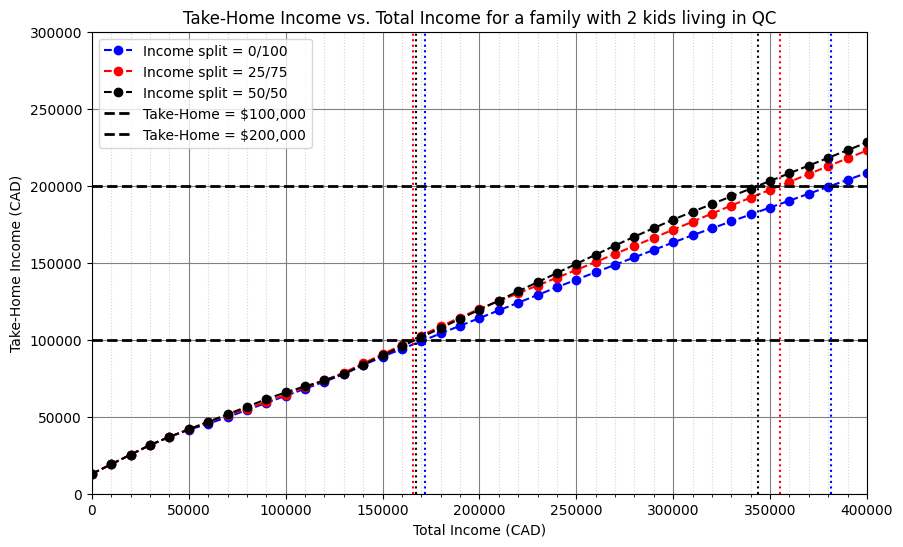

In [21]:
province = 'QC'
children_under_6 = 1
children_aged_6_to_17 = 1

# Range of incomes to simulate
total_income = np.linspace(0, 400000, 41)  # Generates 10 linearly spaced values from 20k to 100k


income_splits=['0/100','25/75','50/50']
results={}

for split in income_splits:
    # Parse the split ratios
    split_ratio = split.split('/')
    income1_ratio = int(split_ratio[0]) / 100
    income2_ratio = int(split_ratio[1]) / 100

    # Calculate the take-home income for each total_income based on the split
    results[split] = [
        calculate_take_home(income1_ratio * total_income, income2_ratio * total_income, province, children_under_6, children_aged_6_to_17)
        for total_income in total_income
    ]


plt.figure(figsize=(10, 6))
colors = {'0/100': 'blue', '25/75': 'red', '50/50': 'black'}
for split, color in colors.items():
    plt.plot(total_income, results[split], marker='o', linestyle='--', color=color, label=f'Income split = {split}')

# Add horizontal line
y_intercept = 100000
plt.axhline(y=y_intercept, color='black', linestyle='--',linewidth=2, label='Take-Home = $100,000')

# Add horizontal line
y_intercept_2 = 200000
plt.axhline(y=y_intercept_2, color='black', linestyle='--',linewidth=2, label='Take-Home = $200,000')

# Find intersections and plot vertical lines
for split, color in colors.items():
    # np.interp for linear interpolation to find the income where the result equals 100000 and 200000
    income_at_intercept = np.interp(y_intercept, results[split], total_income)
    plt.axvline(x=income_at_intercept, color=color, linestyle=':')
    income_at_intercept2 = np.interp(y_intercept_2, results[split], total_income)
    plt.axvline(x=income_at_intercept2, color=color, linestyle=':')

plt.title(f'Take-Home Income vs. Total Income for a family with {children_under_6+children_aged_6_to_17} kids living in {province}')
plt.xlabel('Total Income (CAD)')
plt.ylabel('Take-Home Income (CAD)')
plt.xlim(00000, 400000)
plt.ylim(00000, 300000)
plt.legend()

# Set major ticks at every 50,000
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

# Set minor ticks at every 10,000
plt.gca().xaxis.set_minor_locator(MultipleLocator(10000))

# Enable grid on minor ticks for x-axis, maintaining grid for major ticks
plt.grid(True, which='minor', linestyle=':', color='lightgray')
plt.grid(True, which='major', linestyle='-', color='gray')

plt.show()

Unlike the previous scenarios, the initial take-home income isn't zero when the total income is zero, due to the inclusion of the Canada Child Benefit (CCB). Similar to the previous cases, for lower incomes, there's no significant difference in take-home salaries between the various income distributions. However, at higher income levels, the take-home income would be maximized if both partners have similar salaries.

#Two-Income Family: Total Income vs. Take-Home Income with Varying Numbers of Kids

Now, let's focus on a different issue: determining if having more children results in a better take-home income for families. For this analysis, we will consider a family living in British Columbia (BC). We will examine an income distribution of 25/75 between the partners and look at five scenarios where the number of children varies from 0 to 4. To obtain more realistic results, we assume that in families with four children, two are under the age of 6, and two are between the ages of 7 and 16.

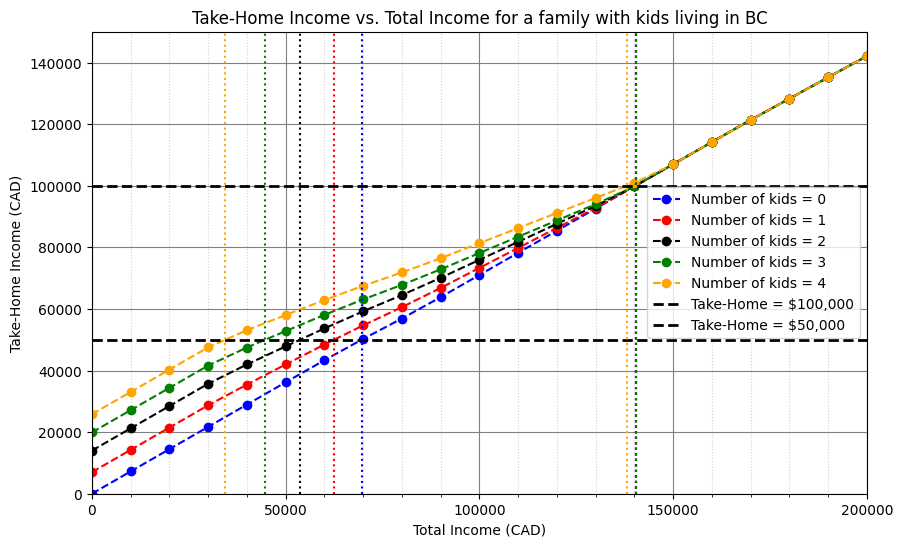

In [22]:
province = 'BC'

# Range of incomes to simulate
total_income = np.linspace(0, 200000, 21)  # Generates 10 linearly spaced values from 20k to 100k

number_of_kids=['0/0','1/0','2/0','2/1','2/2']
income_splits=['0/100','25/75','50/50']
results={}

for kids in number_of_kids:
    # Parse the split ratios
    kids_ratio = kids.split('/')
    children_under_6 = int(kids_ratio[0])
    children_aged_6_to_17 = int(kids_ratio[1])

    # Calculate the take-home income for each total_income based on the split
    results[kids] = [
        calculate_take_home(0.75 * total_income, 0.25 * total_income, province, children_under_6, children_aged_6_to_17)
        for total_income in total_income
    ]


plt.figure(figsize=(10, 6))
colors = {'0/0': 'blue', '1/0': 'red', '2/0': 'black','2/1':'green','2/2':'orange'}
for split, color in colors.items():
    kids_ratio = split.split('/')
    children_under_6 = int(kids_ratio[0])
    children_aged_6_to_17 = int(kids_ratio[1])
    kids=children_under_6+children_aged_6_to_17
    plt.plot(total_income, results[split], marker='o', linestyle='--', color=color, label=f'Number of kids = {kids}')

# Add horizontal line
y_intercept = 100000
plt.axhline(y=y_intercept, color='black', linestyle='--',linewidth=2, label='Take-Home = $100,000')

# Add horizontal line
y_intercept_2 = 50000
plt.axhline(y=y_intercept_2, color='black', linestyle='--',linewidth=2, label='Take-Home = $50,000')

# Find intersections and plot vertical lines
for split, color in colors.items():
    # np.interp for linear interpolation to find the income where the result equals 100000 and 200000
    income_at_intercept = np.interp(y_intercept, results[split], total_income)
    plt.axvline(x=income_at_intercept, color=color, linestyle=':')
    income_at_intercept2 = np.interp(y_intercept_2, results[split], total_income)
    plt.axvline(x=income_at_intercept2, color=color, linestyle=':')

plt.title(f'Take-Home Income vs. Total Income for a family with kids living in {province}')
plt.xlabel('Total Income (CAD)')
plt.ylabel('Take-Home Income (CAD)')
plt.xlim(00000, 200000)
plt.ylim(00000, 150000)
plt.legend()

# Set major ticks at every 50,000
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

# Set minor ticks at every 10,000
plt.gca().xaxis.set_minor_locator(MultipleLocator(10000))

# Enable grid on minor ticks for x-axis, maintaining grid for major ticks
plt.grid(True, which='minor', linestyle=':', color='lightgray')
plt.grid(True, which='major', linestyle='-', color='gray')

plt.show()

Among all the cases we explored, this one is a very interesting case. For incomes above \$150,000, there are no differences in take-home salaries for the five families considered. This is due to the fact that the Canada Child Benefit (CCB) is reduced according to the family's income. However, when the incomes are low, it tells a totally different story. First of all, even if the parents don't work, a family with four kids will get a take-home amount of \$25,000. To achieve a take-home amount of \$50,000, a family with four kids needs to earn a combined amount of \$35,000, while a family without kids must earn almost \$75,000. Even a family with a single child needs to earn \$62,000 to receive a take-home income of \$50,000.

If we look at a fixed line at the total income, we can see that having more children is advantageous for families when the income is low. For example, with a total income of \$50,000, a family with four kids will take home \$58,000, while a family with a single child only takes home \$41,000. One could argue that the government is helping low-income families with children. However, at the same time, one could argue that the government discourages higher income earners from having children while encouraging lower-income families to have children.

#Two-Income Family: Income of the Second Person vs. Take-Home Income While the Income of the First Person Is Fixed

Next, let's approach this from a different angle. Instead of plotting the take-home pay against total income, we'll compare the take-home pay to the income of the second person. This analysis will assist families in deciding whether it would be beneficial for the second person to work by evaluating the advantages and disadvantages of employment. We will explore six different scenarios, where the number of children varies between 0, 2, and 4, with the first person's income set at \$50,000 and \$100,000.

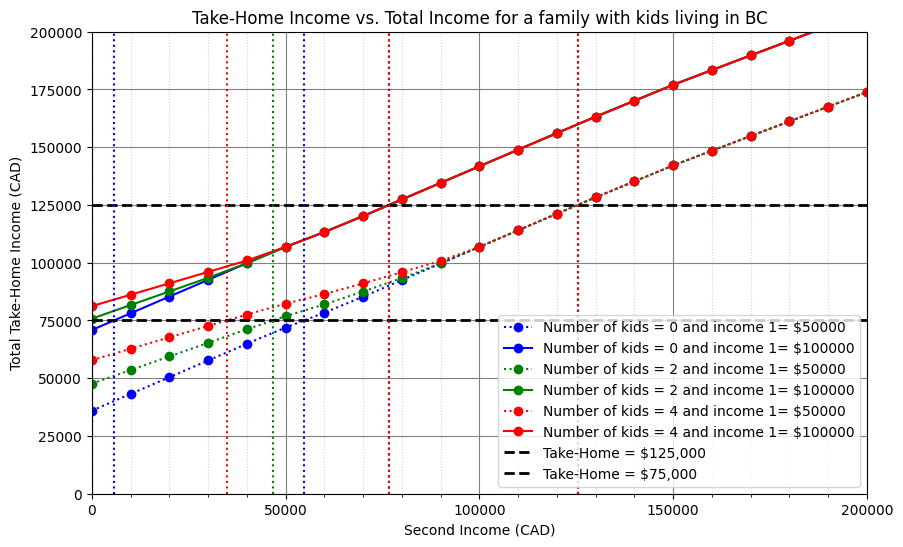

In [23]:
province = 'BC'

# Range of incomes to simulate
second_income = np.linspace(0, 200000, 21)  # Generates 10 linearly spaced values from 20k to 100k

number_of_kids=['0/0','2/0','2/2']
income1_values=['50000','100000']

results={}

for kids in number_of_kids:
    for income1 in income1_values:
      kids_ratio = kids.split('/')
      children_under_6 = int(kids_ratio[0])
      children_aged_6_to_17 = int(kids_ratio[1])

      # Calculate the take-home income for each total_income based on the split
      results['_'.join([kids,income1])] = [
          calculate_take_home(int(income1), income2, province, children_under_6, children_aged_6_to_17)
          for income2 in second_income
      ]


plt.figure(figsize=(10, 6))
colors = {'0/0': 'blue', '2/0': 'green','2/2':'red'}
line_style={'50000':':','100000':'-'}
for split, color in colors.items():
  for income1, line in line_style.items():
    kids_ratio = split.split('/')
    children_under_6 = int(kids_ratio[0])
    children_aged_6_to_17 = int(kids_ratio[1])
    kids=children_under_6+children_aged_6_to_17
    plt.plot(second_income, results['_'.join([split,income1])], marker='o', linestyle=line, color=color, label=f'Number of kids = {kids} and income 1= ${income1}')

# Add horizontal line
y_intercept = 125000
plt.axhline(y=y_intercept, color='black', linestyle='--',linewidth=2, label='Take-Home = $125,000')

# Add horizontal line
y_intercept_2 = 75000
plt.axhline(y=y_intercept_2, color='black', linestyle='--',linewidth=2, label='Take-Home = $75,000')

# Find intersections and plot vertical lines
for split, color in colors.items():
  for income1, line in line_style.items():
    # np.interp for linear interpolation to find the income where the result equals 100000 and 200000
    income_at_intercept = np.interp(y_intercept, results['_'.join([split,income1])], second_income)
    plt.axvline(x=income_at_intercept, color=color, linestyle=':')
    income_at_intercept2 = np.interp(y_intercept_2, results['_'.join([split,income1])], second_income)
    plt.axvline(x=income_at_intercept2, color=color, linestyle=':')

plt.title(f'Take-Home Income vs. Total Income for a family with kids living in {province}')
plt.xlabel('Second Income (CAD)')
plt.ylabel('Total Take-Home Income (CAD)')
plt.xlim(00000, 200000)
plt.ylim(00000, 200000)
plt.legend()

# Set major ticks at every 50,000
plt.gca().xaxis.set_major_locator(MultipleLocator(50000))

# Set minor ticks at every 10,000
plt.gca().xaxis.set_minor_locator(MultipleLocator(10000))

# Enable grid on minor ticks for x-axis, maintaining grid for major ticks
plt.grid(True, which='minor', linestyle=':', color='lightgray')
plt.grid(True, which='major', linestyle='-', color='gray')

plt.show()

Once again, this figure reveals some interesting trends. Since we analyzed two different income values of the first person (i.e., \$50,000 and \$100,000), we can clearly distinguish two sets of graphs (one in dotted lines and one in solid lines). Within these two groups, we observe the three scenarios we considered, each with varying numbers of children in the families. A major trend is that the three subsets with different numbers of children will converge to the same line when the income of the second person is high. This convergence occurs around an income of \$100,000 for the second person when the income of the first person is \$50,000. Conversely, we see the same phenomenon when the income of the second person is \$50,000 and the first person is earning \$100,000. Before these convergence points, the take-home income is significantly higher when the number of children is greater, under the same first and second incomes.

So, how can we interpret these results? One way is to look at the slope of the graph before it converges to a single line at higher incomes. According to this analysis, if the number of kids is low, there is a higher slope for both scenarios. In other words, if the number of kids is low or none, then the second person's income will significantly improve the total take-home income of the family more than in other cases. However, after reaching a certain income level, there will be no difference in the take-home income, regardless of the number of children in the family.